In [118]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Data Loading and Exploration


In [119]:
# Load all three datasets
features = pd.read_csv('dataset/Features data set.csv')
sales = pd.read_csv('dataset/sales data-set.csv')
stores = pd.read_csv('dataset/stores data-set.csv')

# Display basic information about each dataset
print("Features Dataset Info:")
print(f"Shape: {features.shape}")
print(f"Columns: {features.columns.tolist()}")
print("\nSales Dataset Info:")
print(f"Shape: {sales.shape}")
print(f"Columns: {sales.columns.tolist()}")
print("\nStores Dataset Info:")
print(f"Shape: {stores.shape}")
print(f"Columns: {stores.columns.tolist()}")

# Check for missing values
print("\nMissing Values:")
print("Features:", features.isnull().sum().sum())
print("Sales:", sales.isnull().sum().sum())
print("Stores:", stores.isnull().sum().sum())

# Display first few rows of each dataset
print("\nFeatures Data Sample:")
display(features.head())
print("\nSales Data Sample:")
display(sales.head())
print("\nStores Data Sample:")
display(stores.head())

Features Dataset Info:
Shape: (8190, 12)
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']

Sales Dataset Info:
Shape: (421570, 5)
Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

Stores Dataset Info:
Shape: (45, 3)
Columns: ['Store', 'Type', 'Size']

Missing Values:
Features: 24040
Sales: 0
Stores: 0

Features Data Sample:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



Sales Data Sample:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False



Stores Data Sample:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [120]:
# Merge datasets for comprehensive analysis
# First merge sales with stores
sales_stores = pd.merge(sales, stores, on='Store', how='left')

# Then merge with features
full_data_raw = pd.merge(sales_stores, features, on=['Store', 'Date', 'IsHoliday'], how='left')

print("Merged Dataset Shape:", full_data_raw.shape)
print("Merged Dataset Columns:", full_data_raw.columns.tolist())

Merged Dataset Shape: (421570, 16)
Merged Dataset Columns: ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


Data Cleaning

In [121]:
# Add this section right after loading and exploring the datasets
# and before starting the statistical analyses

## DATA CLEANING AND PREPROCESSING SECTION

print("="*70)
print("DATA CLEANING AND PREPROCESSING")
print("="*70)

# Check for missing values in each dataset
print("1. INITIAL MISSING VALUES ANALYSIS:")
print("\nFeatures Dataset:")
print(features.isnull().sum())
print("\nSales Dataset:")
print(sales.isnull().sum())
print("\nStores Dataset:")
print(stores.isnull().sum())


print(f"\nMerged dataset shape: {full_data_raw.shape}")
print("\nMissing values in merged dataset:")
missing_summary = full_data_raw.isnull().sum()
print(missing_summary[missing_summary > 0])

DATA CLEANING AND PREPROCESSING
1. INITIAL MISSING VALUES ANALYSIS:

Features Dataset:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Sales Dataset:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Stores Dataset:
Store    0
Type     0
Size     0
dtype: int64

Merged dataset shape: (421570, 16)

Missing values in merged dataset:
MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64


In [122]:
# 2. STRATEGIC HANDLING OF MISSING VALUES

def clean_retail_data(df):
    """
    Comprehensive data cleaning function for retail dataset
    """
    df_clean = df.copy()
    
    print("\n2. DATA CLEANING STRATEGIES:")
    
    # Handle MarkDown columns - these represent promotional spending
    markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
    
    for col in markdown_cols:
        if col in df_clean.columns:
            missing_count = df_clean[col].isnull().sum()
            missing_pct = (missing_count / len(df_clean)) * 100
            
            print(f"\n{col}:")
            print(f"  - Missing values: {missing_count} ({missing_pct:.2f}%)")
            
            # Strategy: Replace nulls with 0 (assuming no markdown = no promotional spending)
            df_clean[col] = df_clean[col].fillna(0)
            print(f"  - Strategy: Replaced nulls with 0 (no promotional spending)")
            
            # Validate
            print(f"  - After cleaning: {df_clean[col].isnull().sum()} missing values")
    
    # Handle CPI (Consumer Price Index) - use forward/backward fill or median
    if 'CPI' in df_clean.columns:
        cpi_missing = df_clean['CPI'].isnull().sum()
        print(f"\nCPI:")
        print(f"  - Missing values: {cpi_missing} ({(cpi_missing/len(df_clean))*100:.2f}%)")
        
        # Strategy: Use store-specific median CPI
        store_cpi_median = df_clean.groupby('Store')['CPI'].transform('median')
        df_clean['CPI'] = df_clean['CPI'].fillna(store_cpi_median)
        
        # If any remaining, use overall median
        overall_cpi_median = df_clean['CPI'].median()
        df_clean['CPI'] = df_clean['CPI'].fillna(overall_cpi_median)
        
        print(f"  - Strategy: Used store-specific median, then overall median")
        print(f"  - After cleaning: {df_clean['CPI'].isnull().sum()} missing values")
    
    # Handle Unemployment - similar strategy as CPI
    if 'Unemployment' in df_clean.columns:
        unemp_missing = df_clean['Unemployment'].isnull().sum()
        print(f"\nUnemployment:")
        print(f"  - Missing values: {unemp_missing} ({(unemp_missing/len(df_clean))*100:.2f}%)")
        
        # Strategy: Use store-specific median unemployment
        store_unemp_median = df_clean.groupby('Store')['Unemployment'].transform('median')
        df_clean['Unemployment'] = df_clean['Unemployment'].fillna(store_unemp_median)
        
        # If any remaining, use overall median
        overall_unemp_median = df_clean['Unemployment'].median()
        df_clean['Unemployment'] = df_clean['Unemployment'].fillna(overall_unemp_median)
        
        print(f"  - Strategy: Used store-specific median, then overall median")
        print(f"  - After cleaning: {df_clean['Unemployment'].isnull().sum()} missing values")
    
    # Handle Temperature, Fuel_Price, etc. - use time-based imputation
    time_based_cols = ['Temperature', 'Fuel_Price']
    
    for col in time_based_cols:
        if col in df_clean.columns:
            missing_count = df_clean[col].isnull().sum()
            if missing_count > 0:
                print(f"\n{col}:")
                print(f"  - Missing values: {missing_count} ({(missing_count/len(df_clean))*100:.2f}%)")
                
                # Convert Date to datetime if not already
                df_clean['Date'] = pd.to_datetime(df_clean['Date'])
                
                # Strategy: Use same store, nearby dates average
                df_clean_sorted = df_clean.sort_values(['Store', 'Date'])
                df_clean[col] = df_clean.groupby('Store')[col].transform(
                    lambda x: x.fillna(x.rolling(window=7, min_periods=1).mean())
                )
                
                # If any remaining, use overall median
                overall_median = df_clean[col].median()
                df_clean[col] = df_clean[col].fillna(overall_median)
                
                print(f"  - Strategy: Used time-based imputation (7-day rolling average)")
                print(f"  - After cleaning: {df_clean[col].isnull().sum()} missing values")
    
    # Check for any remaining missing values
    remaining_missing = df_clean.isnull().sum().sum()
    print(f"\n3. CLEANING SUMMARY:")
    print(f"  - Total remaining missing values: {remaining_missing}")
    print(f"  - Cleaning completion: {((len(df_clean) - remaining_missing) / len(df_clean)) * 100:.2f}%")
    
    return df_clean

# Apply data cleaning
print("Starting data cleaning process...")
full_data = clean_retail_data(full_data_raw)
display(full_data.head())

Starting data cleaning process...

2. DATA CLEANING STRATEGIES:

MarkDown1:
  - Missing values: 270889 (64.26%)
  - Strategy: Replaced nulls with 0 (no promotional spending)
  - After cleaning: 0 missing values

MarkDown2:
  - Missing values: 310322 (73.61%)
  - Strategy: Replaced nulls with 0 (no promotional spending)
  - After cleaning: 0 missing values

MarkDown3:
  - Missing values: 284479 (67.48%)
  - Strategy: Replaced nulls with 0 (no promotional spending)
  - After cleaning: 0 missing values

MarkDown4:
  - Missing values: 286603 (67.98%)
  - Strategy: Replaced nulls with 0 (no promotional spending)
  - After cleaning: 0 missing values

MarkDown5:
  - Missing values: 270138 (64.08%)
  - Strategy: Replaced nulls with 0 (no promotional spending)
  - After cleaning: 0 missing values

CPI:
  - Missing values: 0 (0.00%)
  - Strategy: Used store-specific median, then overall median
  - After cleaning: 0 missing values

Unemployment:
  - Missing values: 0 (0.00%)
  - Strategy: Used st

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [123]:
# 3. DATA VALIDATION AND QUALITY CHECKS

print("\n4. DATA VALIDATION CHECKS:")

# Check for negative values in key columns
print("\nNegative Value Check:")
numeric_columns = full_data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if col != 'IsHoliday':  # Skip boolean column
        negative_count = (full_data[col] < 0).sum()
        if negative_count > 0:
            print(f"  - {col}: {negative_count} negative values")

# Check for zero values in key columns
print("\nZero Value Analysis:")
key_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in key_columns:
    if col in full_data.columns:
        zero_count = (full_data[col] == 0).sum()
        zero_pct = (zero_count / len(full_data)) * 100
        print(f"  - {col}: {zero_count} zero values ({zero_pct:.2f}%)")

# Check data types and conversions
print("\nData Type Validation:")
print(f"  - Date column type: {full_data['Date'].dtype}")
print(f"  - IsHoliday column type: {full_data['IsHoliday'].dtype}")

# Check for duplicate records
duplicates = full_data.duplicated().sum()
print(f"  - Duplicate records: {duplicates}")

# Validate store types
if 'Type' in full_data.columns:
    print(f"\nStore Type Distribution:")
    print(full_data['Type'].value_counts())


4. DATA VALIDATION CHECKS:

Negative Value Check:
  - Weekly_Sales: 1285 negative values
  - Temperature: 69 negative values
  - MarkDown2: 1311 negative values
  - MarkDown3: 257 negative values

Zero Value Analysis:
  - Weekly_Sales: 73 zero values (0.02%)
  - Temperature: 0 zero values (0.00%)
  - Fuel_Price: 0 zero values (0.00%)
  - CPI: 0 zero values (0.00%)
  - Unemployment: 0 zero values (0.00%)

Data Type Validation:
  - Date column type: object
  - IsHoliday column type: bool
  - Duplicate records: 0

Store Type Distribution:
Type
A    215478
B    163495
C     42597
Name: count, dtype: int64


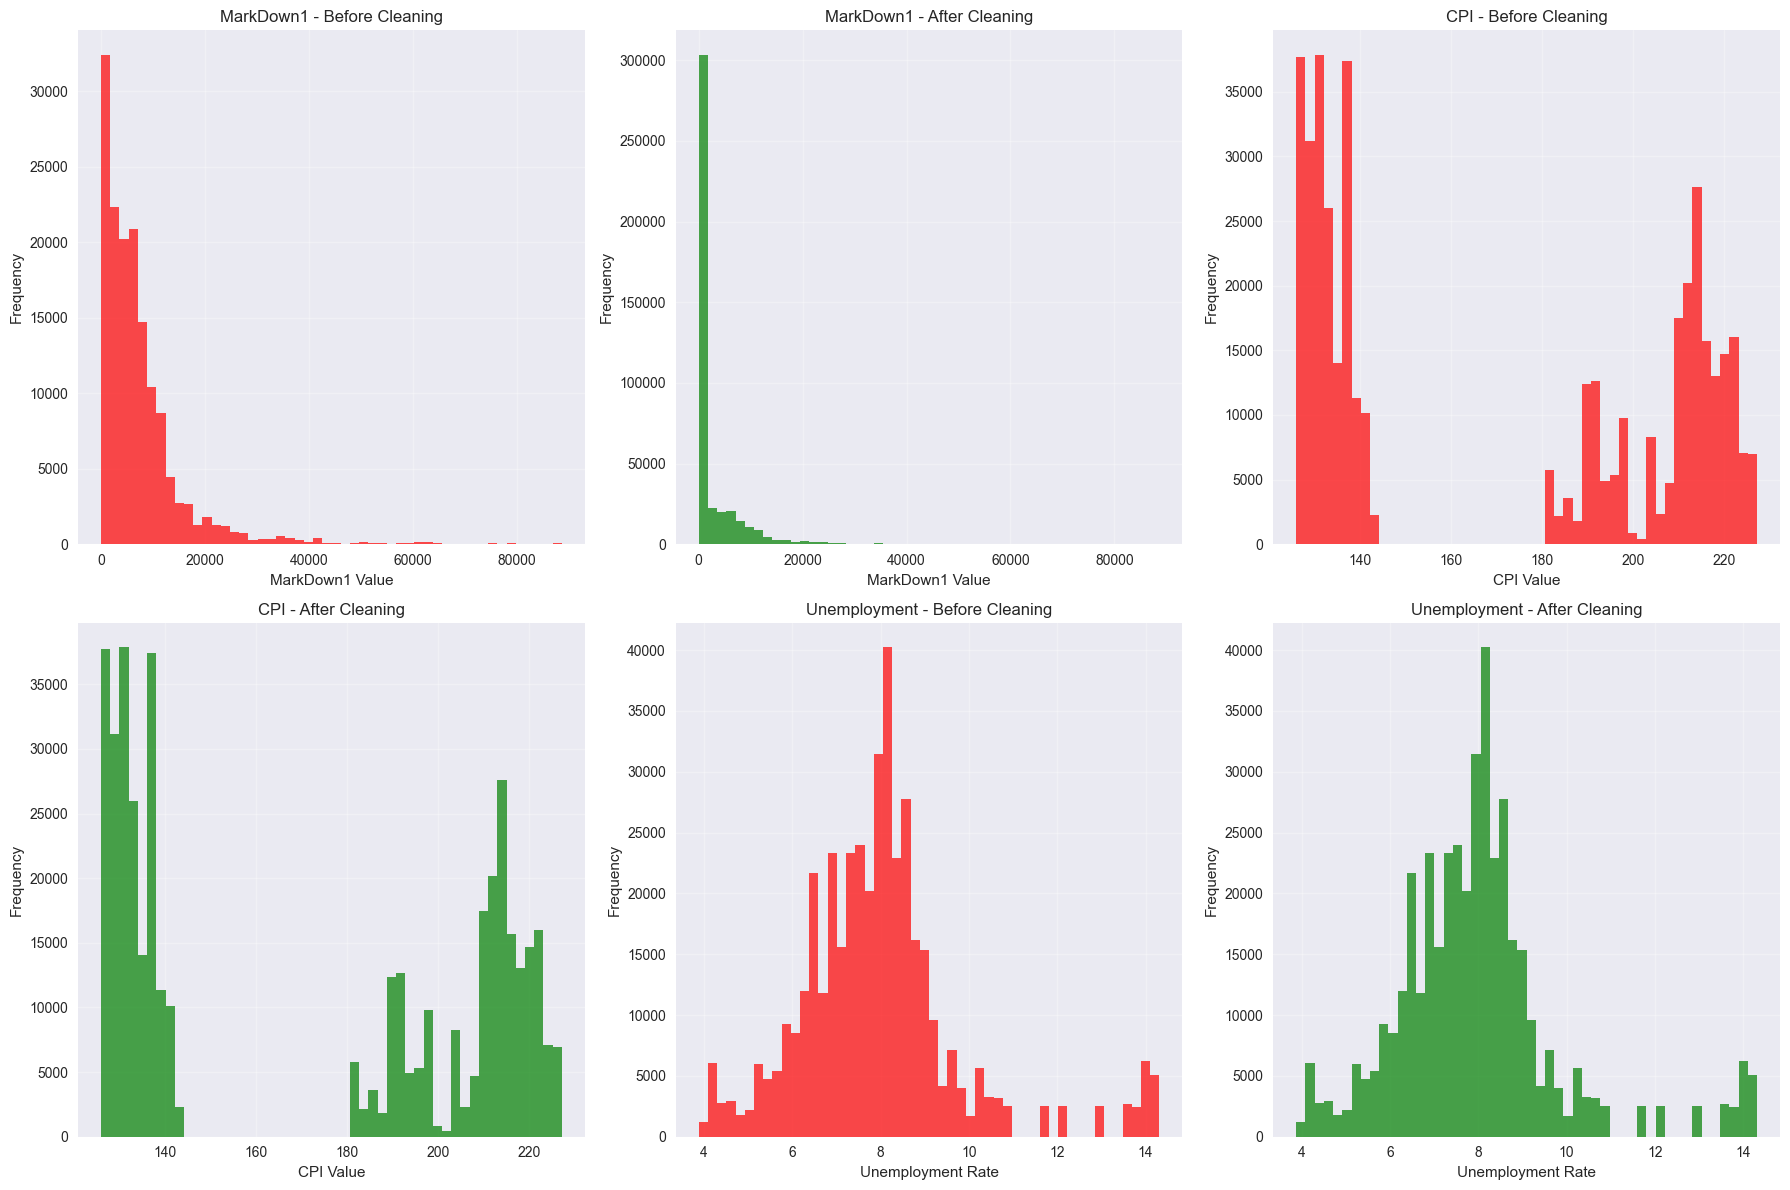

In [124]:
# 4. COMPARE BEFORE AND AFTER CLEANING

# Create comparison visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# MarkDown1 before and after cleaning
if 'MarkDown1' in full_data_raw.columns:
    # Before cleaning
    axes[0,0].hist(full_data_raw['MarkDown1'].dropna(), bins=50, alpha=0.7, color='red', label='Before Cleaning')
    axes[0,0].set_title('MarkDown1 - Before Cleaning')
    axes[0,0].set_xlabel('MarkDown1 Value')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].grid(True, alpha=0.3)
    
    # After cleaning
    axes[0,1].hist(full_data['MarkDown1'], bins=50, alpha=0.7, color='green', label='After Cleaning')
    axes[0,1].set_title('MarkDown1 - After Cleaning')
    axes[0,1].set_xlabel('MarkDown1 Value')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].grid(True, alpha=0.3)

# CPI before and after cleaning
if 'CPI' in full_data_raw.columns:
    # Before cleaning
    axes[0,2].hist(full_data_raw['CPI'].dropna(), bins=50, alpha=0.7, color='red', label='Before Cleaning')
    axes[0,2].set_title('CPI - Before Cleaning')
    axes[0,2].set_xlabel('CPI Value')
    axes[0,2].set_ylabel('Frequency')
    axes[0,2].grid(True, alpha=0.3)
    
    # After cleaning
    axes[1,0].hist(full_data['CPI'], bins=50, alpha=0.7, color='green', label='After Cleaning')
    axes[1,0].set_title('CPI - After Cleaning')
    axes[1,0].set_xlabel('CPI Value')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].grid(True, alpha=0.3)

# Unemployment before and after cleaning
if 'Unemployment' in full_data_raw.columns:
    # Before cleaning
    axes[1,1].hist(full_data_raw['Unemployment'].dropna(), bins=50, alpha=0.7, color='red', label='Before Cleaning')
    axes[1,1].set_title('Unemployment - Before Cleaning')
    axes[1,1].set_xlabel('Unemployment Rate')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].grid(True, alpha=0.3)
    
    # After cleaning
    axes[1,2].hist(full_data['Unemployment'], bins=50, alpha=0.7, color='green', label='After Cleaning')
    axes[1,2].set_title('Unemployment - After Cleaning')
    axes[1,2].set_xlabel('Unemployment Rate')
    axes[1,2].set_ylabel('Frequency')
    axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Basic Statistical Analysis

2.1 Compute mean and standard deviation of sales

In [125]:
# Basic statistics for sales
sales_stats = full_data['Weekly_Sales'].describe()
mean_sales = sales_stats['mean']
std_sales = sales_stats['std']

print("SALES STATISTICS:")
print(f"Mean Weekly Sales: {mean_sales:.2f}")
print(f"Standard Deviation of Weekly Sales: {std_sales:.2f}")
print(f"Coefficient of Variation: {(std_sales/mean_sales)*100:.2f}%")

# Additional statistics
median_sales = full_data['Weekly_Sales'].median()
mode_sales = full_data['Weekly_Sales'].mode()[0]

print(f"Median Weekly Sales: {median_sales:.2f}")
print(f"Mode Weekly Sales: {mode_sales:.2f}")

SALES STATISTICS:
Mean Weekly Sales: 15981.26
Standard Deviation of Weekly Sales: 22711.18
Coefficient of Variation: 142.11%
Median Weekly Sales: 7612.03
Mode Weekly Sales: 10.00


2.2 Interpret the range and interquartile range of sales

In [126]:
# Calculate range and IQR
sales_range = full_data['Weekly_Sales'].max() - full_data['Weekly_Sales'].min()
Q1 = full_data['Weekly_Sales'].quantile(0.25)
Q3 = full_data['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

print("\nRANGE AND INTERQUARTILE RANGE ANALYSIS:")
print(f"Range of Weekly Sales: {sales_range:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")

# Identify outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = full_data[(full_data['Weekly_Sales'] < lower_bound) | (full_data['Weekly_Sales'] > upper_bound)]

print(f"Lower bound for outliers: {lower_bound:.2f}")
print(f"Upper bound for outliers: {upper_bound:.2f}")
print(f"Number of outlier observations: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(full_data))*100:.2f}%")


RANGE AND INTERQUARTILE RANGE ANALYSIS:
Range of Weekly Sales: 698088.30
Interquartile Range (IQR): 18126.20
Q1 (25th percentile): 2079.65
Q3 (75th percentile): 20205.85
Lower bound for outliers: -25109.65
Upper bound for outliers: 47395.16
Number of outlier observations: 35521
Percentage of outliers: 8.43%


2.3 Visualize sales distribution

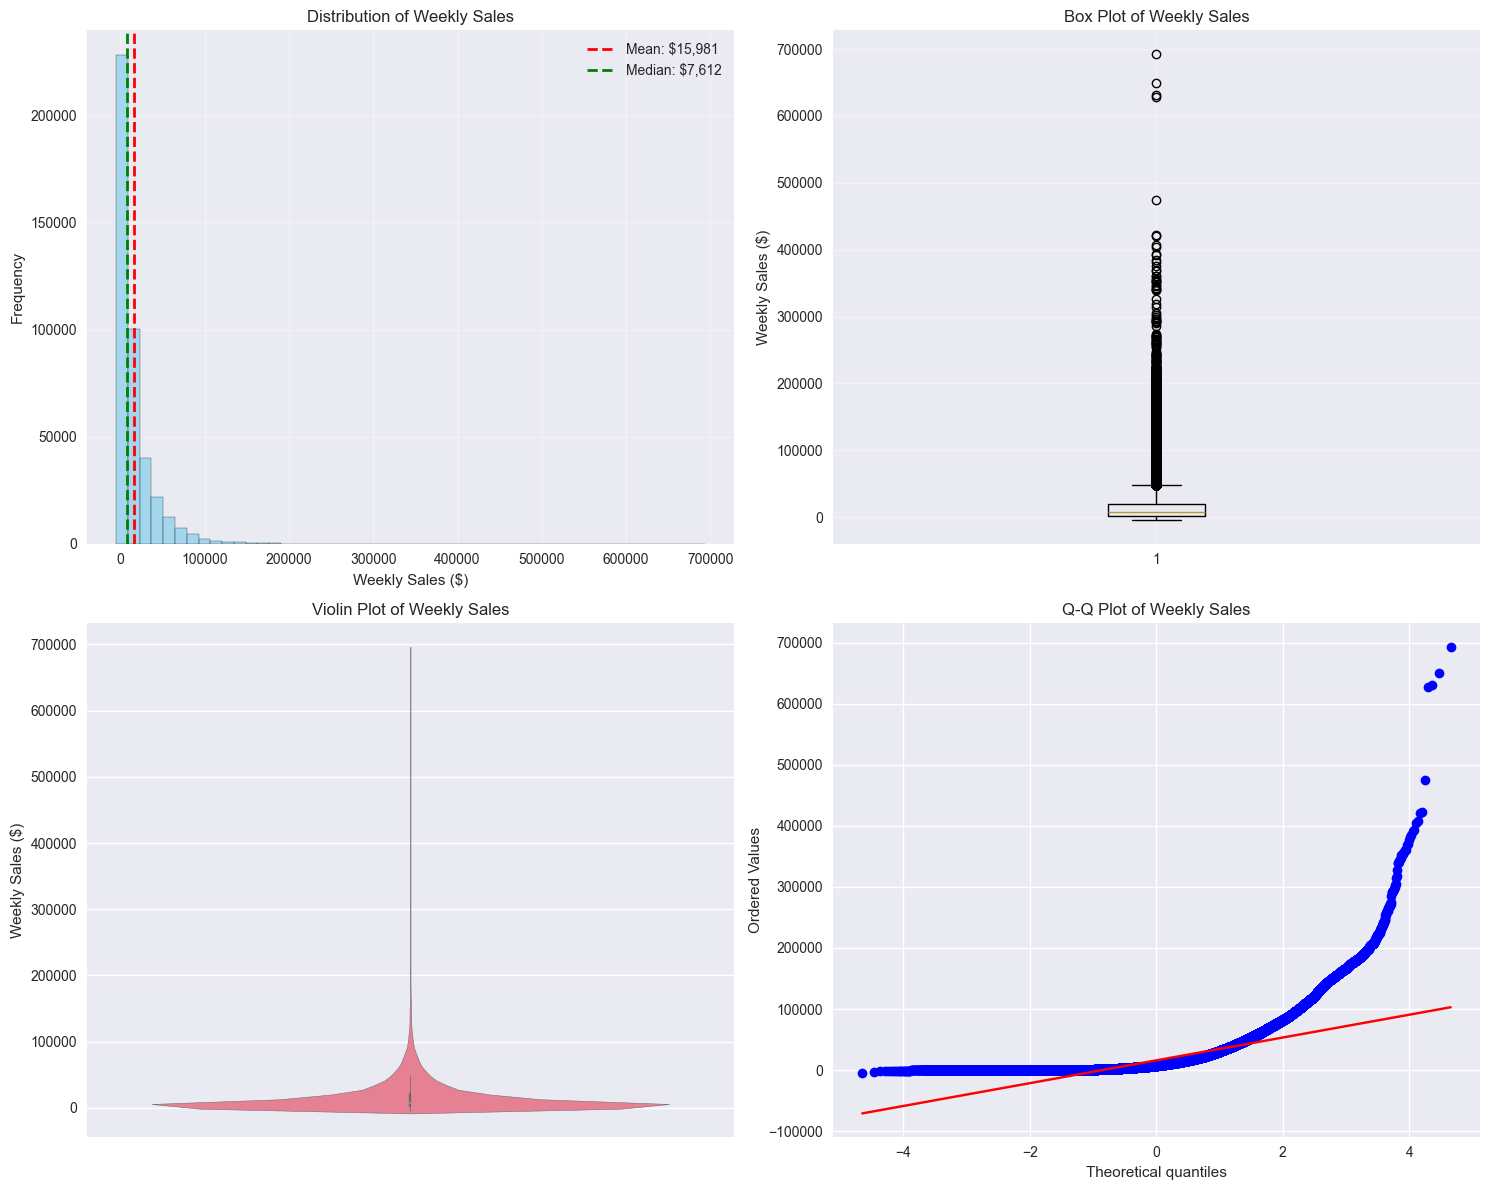

In [127]:
# Create subplots for sales distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram with KDE
axes[0,0].hist(full_data['Weekly_Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_sales:,.0f}')
axes[0,0].axvline(median_sales, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_sales:,.0f}')
axes[0,0].set_xlabel('Weekly Sales ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of Weekly Sales')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Box plot
axes[0,1].boxplot(full_data['Weekly_Sales'])
axes[0,1].set_ylabel('Weekly Sales ($)')
axes[0,1].set_title('Box Plot of Weekly Sales')
axes[0,1].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(y=full_data['Weekly_Sales'], ax=axes[1,0])
axes[1,0].set_ylabel('Weekly Sales ($)')
axes[1,0].set_title('Violin Plot of Weekly Sales')

# Q-Q plot
stats.probplot(full_data['Weekly_Sales'], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot of Weekly Sales')

plt.tight_layout()
plt.show()

# 3. Analyze skewness of profit values


In [128]:
# Since there's no direct profit column, let's calculate it or use available financial metrics
# For this analysis, we'll use MarkDown columns as proxies for profit-related metrics

# Check which columns might represent profit/cost metrics
numeric_columns = full_data.select_dtypes(include=[np.number]).columns
print("Available numeric columns for profit analysis:")
print(numeric_columns.tolist())

# Let's use MarkDown columns as they might represent promotional costs affecting profit
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Calculate skewness for each MarkDown column
print("\nSKEWNESS ANALYSIS OF MARKDOWN/PROFIT-RELATED METRICS:")
for col in markdown_cols:
    if col in full_data.columns:
        skewness = full_data[col].skew()
        print(f"{col}: Skewness = {skewness:.4f}")

# Let's also analyze CPI (Consumer Price Index) as it affects profitability
if 'CPI' in full_data.columns:
    cpi_skewness = full_data['CPI'].skew()
    print(f"CPI: Skewness = {cpi_skewness:.4f}")

# Analyze unemployment as it affects consumer spending and profitability
if 'Unemployment' in full_data.columns:
    unemployment_skewness = full_data['Unemployment'].skew()
    print(f"Unemployment: Skewness = {unemployment_skewness:.4f}")

# Analyze fuel prices as they impact operational costs
if 'Fuel_Price' in full_data.columns:
    fuel_skewness = full_data['Fuel_Price'].skew()
    print(f"Fuel Price: Skewness = {fuel_skewness:.4f}")


Available numeric columns for profit analysis:
['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

SKEWNESS ANALYSIS OF MARKDOWN/PROFIT-RELATED METRICS:
MarkDown1: Skewness = 4.7313
MarkDown2: Skewness = 10.6460
MarkDown3: Skewness = 14.9223
MarkDown4: Skewness = 8.0777
MarkDown5: Skewness = 9.9645
CPI: Skewness = 0.0852
Unemployment: Skewness = 1.1837
Fuel Price: Skewness = -0.1049


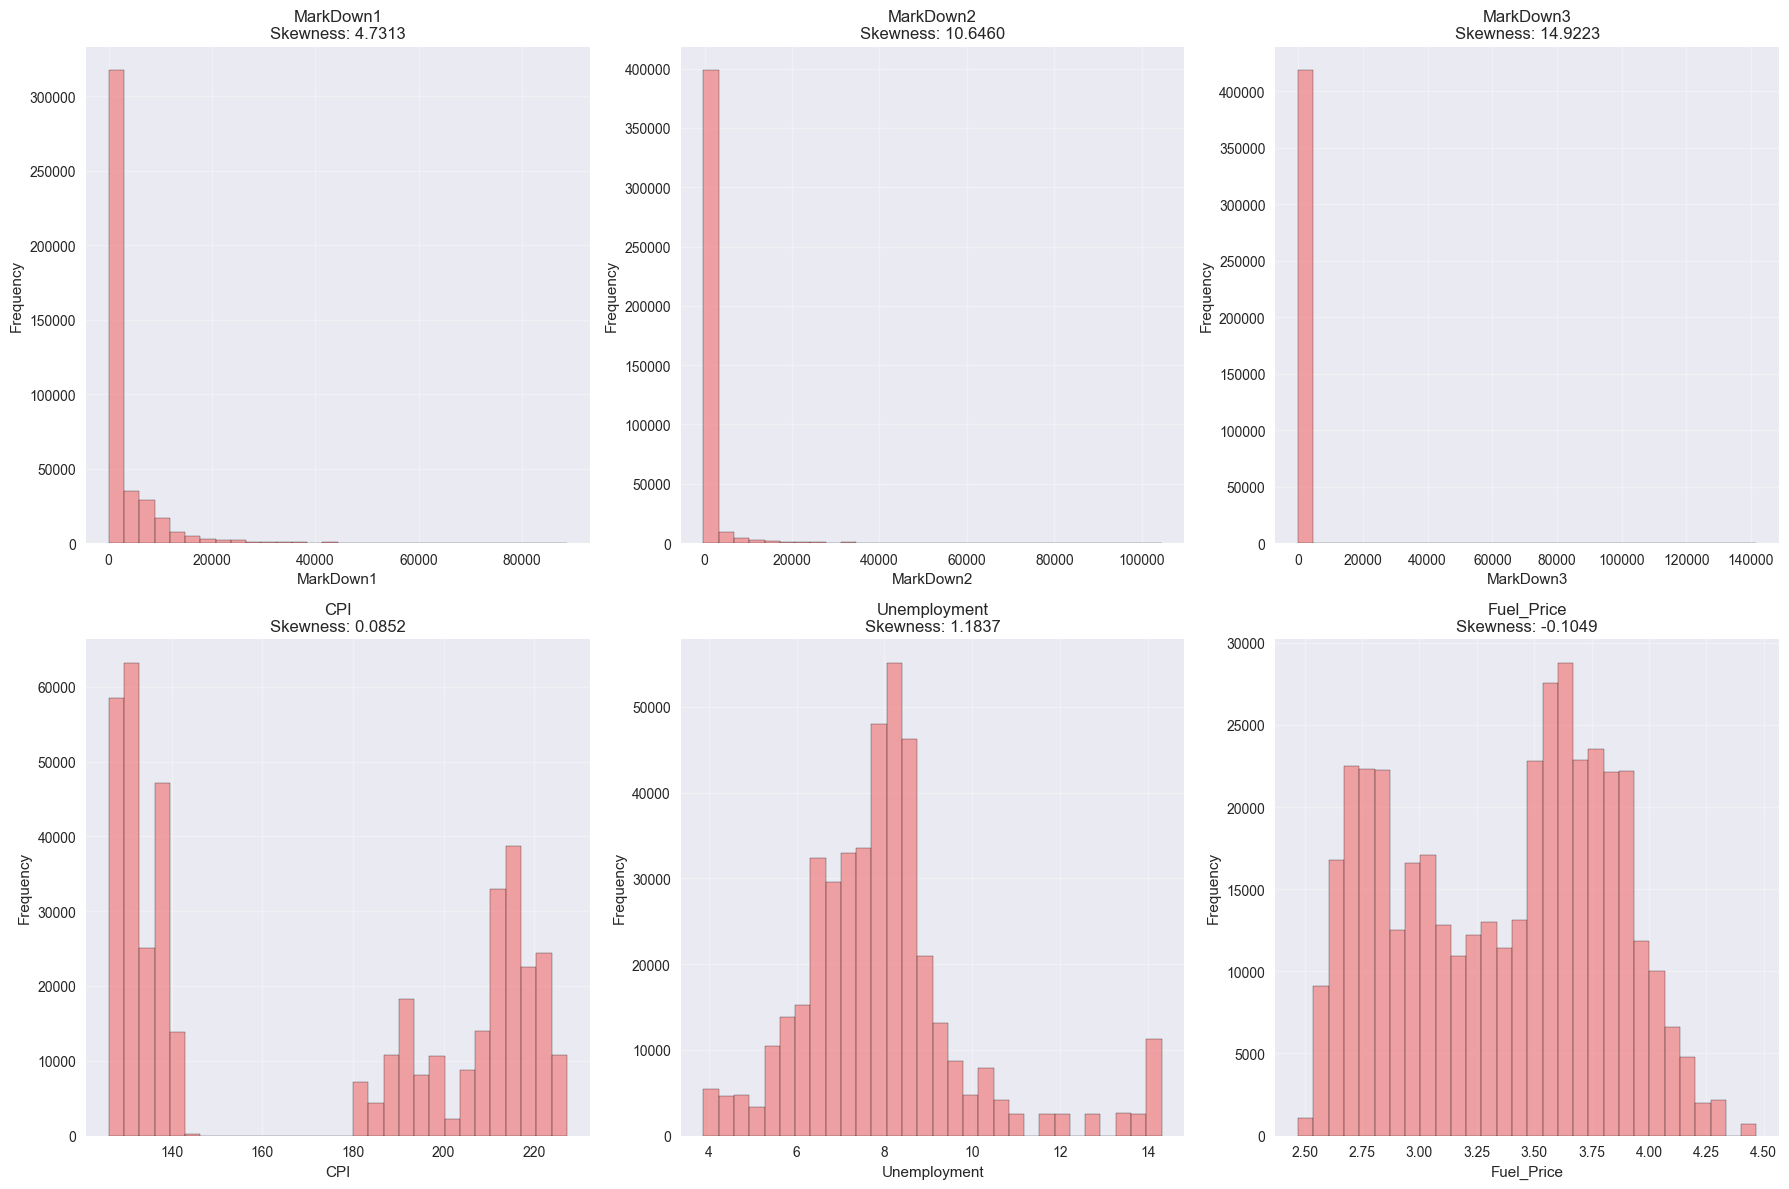

In [129]:
# Visualize skewness of key financial metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
financial_metrics = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'CPI', 'Unemployment', 'Fuel_Price']

for i, metric in enumerate(financial_metrics):
    if metric in full_data.columns:
        row = i // 3
        col = i % 3
        
        # Remove NaN values for plotting
        data = full_data[metric].dropna()
        
        # Histogram
        axes[row, col].hist(data, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[row, col].set_xlabel(metric)
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].set_title(f'{metric}\nSkewness: {data.skew():.4f}')
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Advanced Analysis 1: Regression Analysis

4.1 Predict sales by store type

In [130]:
# Prepare data for regression analysis
regression_data = full_data.copy()

# Convert categorical variables to dummy variables
regression_data = pd.get_dummies(regression_data, columns=['Type'], prefix='StoreType')

# Handle missing values
regression_data = regression_data.dropna()

# Select features for regression
feature_columns = ['Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
                   'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                   'StoreType_A', 'StoreType_B', 'StoreType_C', 'IsHoliday']

X = regression_data[feature_columns]
y = regression_data['Weekly_Sales']

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Calculate predictions and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Regression statistics
print("REGRESSION ANALYSIS RESULTS:")
print(f"R-squared: {model.score(X, y):.4f}")
print(f"Adjusted R-squared: {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1):.4f}")
print(f"Number of observations: {len(y)}")
print(f"Standard deviation of residuals: {residuals.std():,.2f}")

REGRESSION ANALYSIS RESULTS:
R-squared: 0.0635
Adjusted R-squared: 0.0635
Number of observations: 421570
Standard deviation of residuals: 21,977.72


4.2 Interpret standard deviation of residuals

In [131]:
# Detailed interpretation of residuals
residual_std = residuals.std()
mean_sales_regression = y.mean()

print("\nRESIDUAL ANALYSIS:")
print(f"Standard Deviation of Residuals: {residual_std:.2f}")
print(f"Mean Weekly Sales: {mean_sales_regression:.2f}")
print(f"Residual Std as % of Mean Sales: {(residual_std/mean_sales_regression)*100:.2f}%")

# Interpretation
print("\nINTERPRETATION OF RESIDUAL STANDARD DEVIATION:")
print(f"The standard deviation of residuals ({residual_std:.2f}) represents the typical")
print(f"prediction error of our regression model. This means that:")
print(f"- About 68% of predictions are within ±{residual_std:.2f} of actual sales")
print(f"- About 95% of predictions are within ±{residual_std*2:.2f} of actual sales")
print(f"- The model explains the variation in sales with an average error of {residual_std:.2f}")

# Compare with original standard deviation
print(f"\nComparison with original sales standard deviation:")
print(f"Original sales std: {std_sales:.2f}")
print(f"Residual std: {residual_std:.2f}")
print(f"Reduction in variability: {((std_sales - residual_std)/std_sales)*100:.2f}%")


RESIDUAL ANALYSIS:
Standard Deviation of Residuals: 21977.72
Mean Weekly Sales: 15981.26
Residual Std as % of Mean Sales: 137.52%

INTERPRETATION OF RESIDUAL STANDARD DEVIATION:
The standard deviation of residuals (21977.72) represents the typical
prediction error of our regression model. This means that:
- About 68% of predictions are within ±21977.72 of actual sales
- About 95% of predictions are within ±43955.43 of actual sales
- The model explains the variation in sales with an average error of 21977.72

Comparison with original sales standard deviation:
Original sales std: 22711.18
Residual std: 21977.72
Reduction in variability: 3.23%


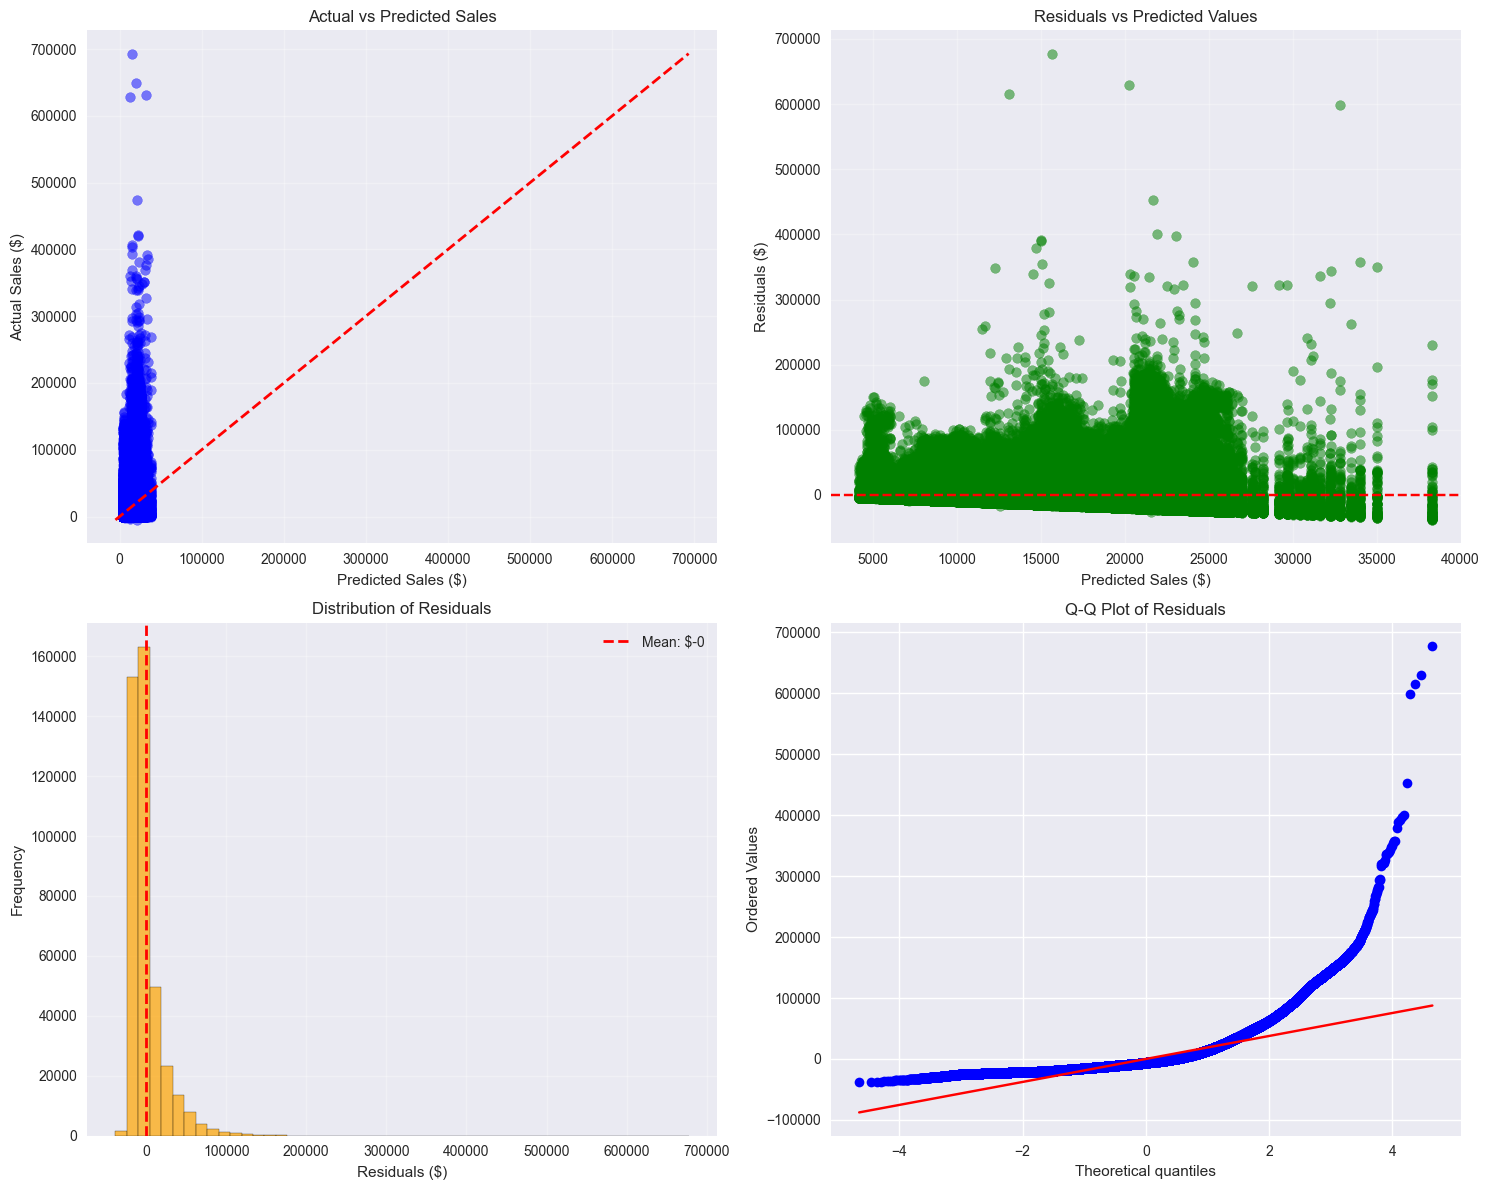

In [132]:
# Visualize regression results and residuals
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Actual vs Predicted
axes[0,0].scatter(y_pred, y, alpha=0.5, color='blue')
axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Predicted Sales ($)')
axes[0,0].set_ylabel('Actual Sales ($)')
axes[0,0].set_title('Actual vs Predicted Sales')
axes[0,0].grid(True, alpha=0.3)

# Residuals vs Predicted
axes[0,1].scatter(y_pred, residuals, alpha=0.5, color='green')
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicted Sales ($)')
axes[0,1].set_ylabel('Residuals ($)')
axes[0,1].set_title('Residuals vs Predicted Values')
axes[0,1].grid(True, alpha=0.3)

# Distribution of residuals
axes[1,0].hist(residuals, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, 
                  label=f'Mean: ${residuals.mean():,.0f}')
axes[1,0].set_xlabel('Residuals ($)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Residuals')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# 5. Advanced Analysis 2: Cluster Analysis

5.1 Group products by sales/profit

In [134]:
# For cluster analysis, let's aggregate data by department (as proxy for products)
dept_sales = full_data.groupby('Dept').agg({
    'Weekly_Sales': ['mean', 'std', 'sum'],
    'MarkDown1': 'mean',  # Using MarkDown as profit proxy
    'MarkDown2': 'mean',
    'MarkDown3': 'mean'
}).round(2)

# Flatten column names
dept_sales.columns = ['_'.join(col).strip() for col in dept_sales.columns.values]
dept_sales = dept_sales.reset_index()

print("Department-level Sales Statistics:")
display(dept_sales.head(10))

Department-level Sales Statistics:


,Dept,Weekly_Sales_mean,Weekly_Sales_std,Weekly_Sales_sum,MarkDown1_mean,MarkDown2_mean,MarkDown3_mean
0,1,19213.49,15102.37,1.236388e+08,2429.02,818.87,429.18
1,2,43607.02,25176.76,2.806112e+08,2429.02,818.87,429.18
2,3,11793.70,12790.99,7.589245e+07,2429.02,818.87,429.18
3,4,25974.63,13261.14,1.671467e+08,2429.02,818.87,429.18
4,5,21365.58,19988.45,1.356074e+08,2462.70,830.23,435.13
5,6,4747.86,4446.43,2.842067e+07,2600.28,875.37,461.12
6,7,24161.24,27985.08,1.554776e+08,2429.02,818.87,429.18
7,8,30191.26,18189.72,1.942808e+08,2429.02,818.87,429.18
8,9,20206.68,16695.73,1.283933e+08,2459.13,828.72,434.65
9,10,18321.27,12992.49,1.178974e+08,2429.02,818.87,429.18


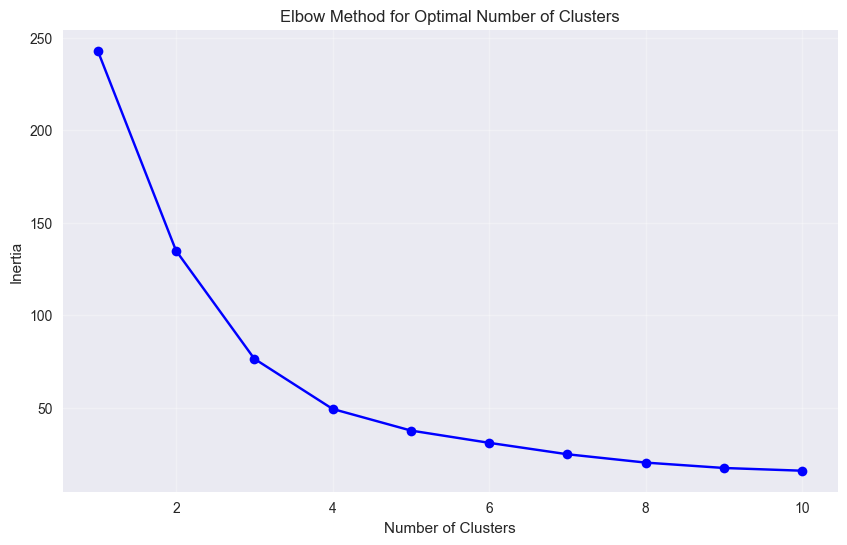

In [135]:
# Prepare data for clustering
cluster_data = dept_sales[['Weekly_Sales_mean', 'Weekly_Sales_std', 'MarkDown1_mean']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Determine optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

In [140]:
# Perform K-means clustering with optimal number of clusters
optimal_k = 4  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to department data
dept_sales['Cluster'] = clusters

print("CLUSTER ANALYSIS RESULTS:")
print(f"Number of departments in each cluster:")
print(dept_sales['Cluster'].value_counts().sort_index())

# Analyze cluster characteristics
cluster_summary = dept_sales.groupby('Cluster').agg({
    'Weekly_Sales_mean': ['mean', 'std'],
    'Weekly_Sales_std': 'mean',
    'MarkDown1_mean': 'mean',
    'Dept': 'count'
}).round(2)

print("\nCluster Characteristics:")
cluster_summary

CLUSTER ANALYSIS RESULTS:
Number of departments in each cluster:
Cluster
0     9
1    43
2    26
3     3
Name: count, dtype: int64

Cluster Characteristics:


Weekly_Sales_mean           Weekly_Sales_std MarkDown1_mean  Dept
                     mean       std             mean           mean count
Cluster                                                                  
0                50835.56  14901.29         31943.09        2459.87     9
1                 3993.02   3112.84          3081.87        2702.09    43
2                19484.32   7901.73         13883.77        2462.63    26
3                  251.86    212.93           484.24        6366.96     3

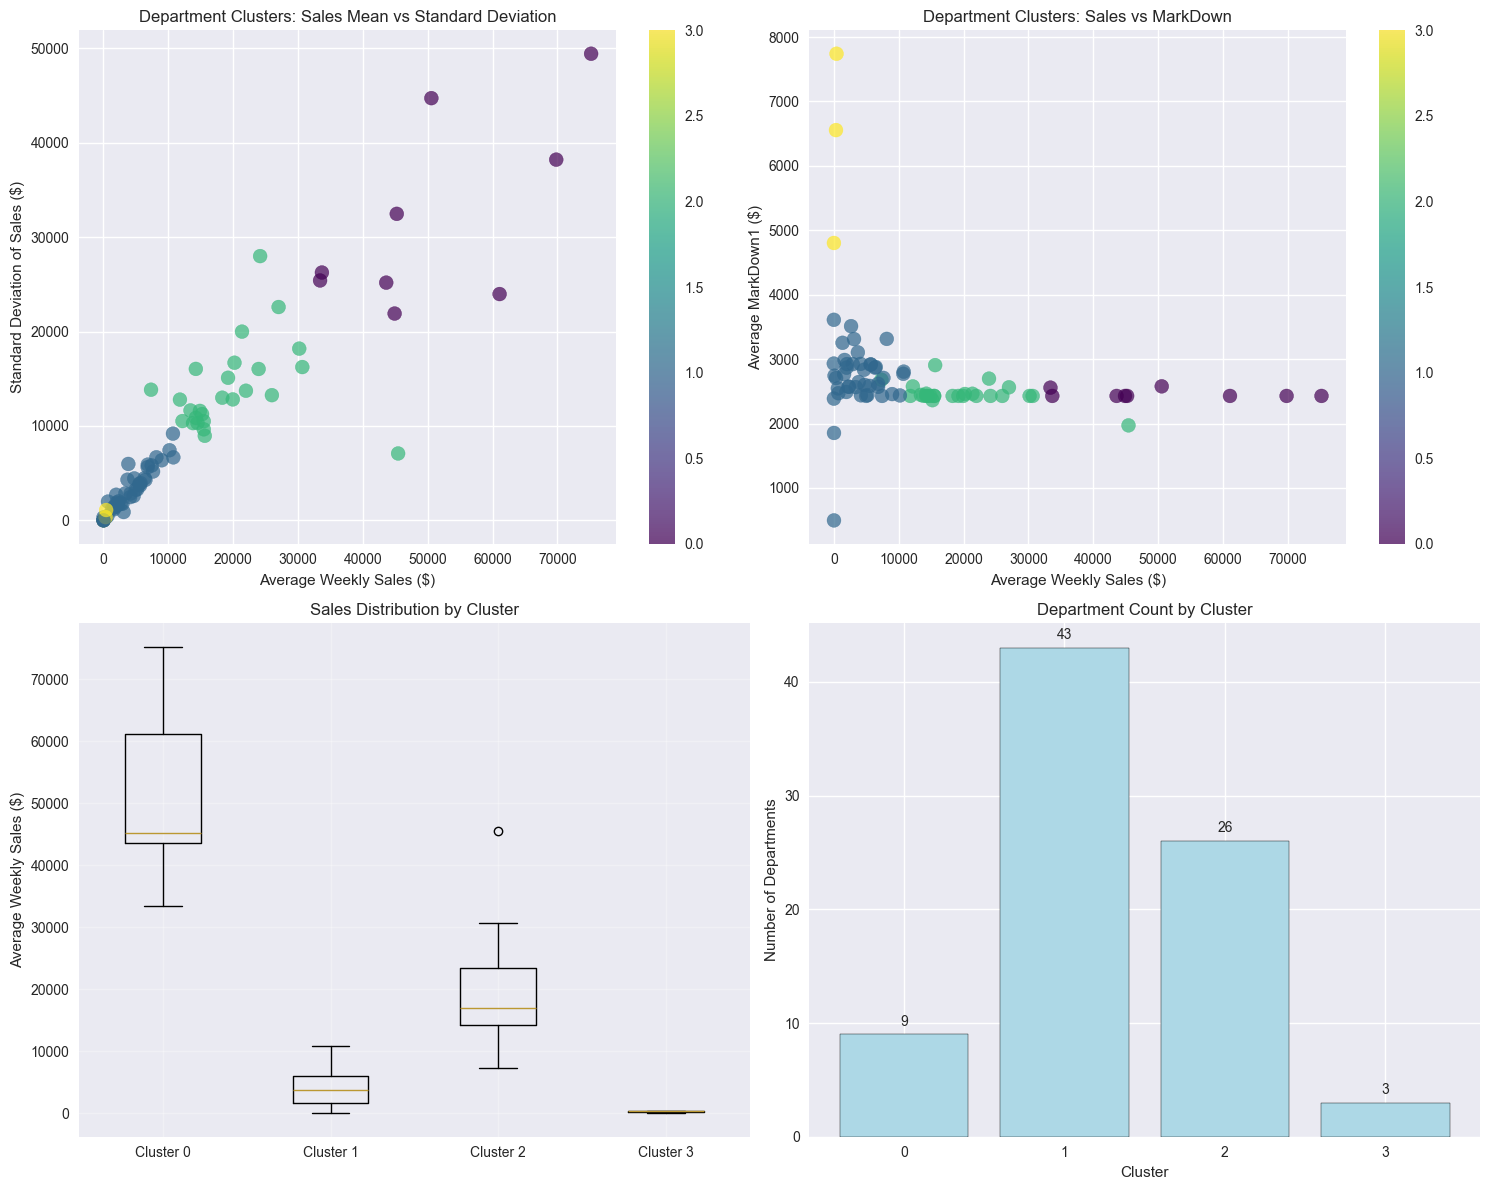

In [141]:
# Visualize clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scatter plot: Sales mean vs Sales std
scatter = axes[0,0].scatter(dept_sales['Weekly_Sales_mean'], 
                           dept_sales['Weekly_Sales_std'], 
                           c=dept_sales['Cluster'], cmap='viridis', s=100, alpha=0.7)
axes[0,0].set_xlabel('Average Weekly Sales ($)')
axes[0,0].set_ylabel('Standard Deviation of Sales ($)')
axes[0,0].set_title('Department Clusters: Sales Mean vs Standard Deviation')
plt.colorbar(scatter, ax=axes[0,0])

# Scatter plot: Sales mean vs MarkDown
scatter = axes[0,1].scatter(dept_sales['Weekly_Sales_mean'], 
                           dept_sales['MarkDown1_mean'], 
                           c=dept_sales['Cluster'], cmap='viridis', s=100, alpha=0.7)
axes[0,1].set_xlabel('Average Weekly Sales ($)')
axes[0,1].set_ylabel('Average MarkDown1 ($)')
axes[0,1].set_title('Department Clusters: Sales vs MarkDown')
plt.colorbar(scatter, ax=axes[0,1])

# Box plots by cluster
cluster_data_box = []
for cluster in range(optimal_k):
    cluster_data_box.append(dept_sales[dept_sales['Cluster'] == cluster]['Weekly_Sales_mean'])
    
axes[1,0].boxplot(cluster_data_box, labels=[f'Cluster {i}' for i in range(optimal_k)])
axes[1,0].set_ylabel('Average Weekly Sales ($)')
axes[1,0].set_title('Sales Distribution by Cluster')
axes[1,0].grid(True, alpha=0.3)

# Bar chart: Department count by cluster
cluster_counts = dept_sales['Cluster'].value_counts().sort_index()
axes[1,1].bar(cluster_counts.index, cluster_counts.values, color='lightblue', edgecolor='black')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Number of Departments')
axes[1,1].set_title('Department Count by Cluster')
axes[1,1].set_xticks(cluster_counts.index)

for i, count in enumerate(cluster_counts.values):
    axes[1,1].text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. Optional: Time Series Analysis on Sales Trends

In [ ]:
# Convert Date to datetime and extract time components
#full_data['Date'] = pd.to_datetime(full_data['Date'])

full_data['Date'] = pd.to_datetime(full_data['Date'], dayfirst=True, errors='coerce', infer_datetime_format=True)

bad_dates = full_data['Date'].isnull().sum()
if bad_dates:
    print(f"Warning: {bad_dates} Date values could not be parsed and were set to NaT.")

full_data['Year'] = full_data['Date'].dt.year
full_data['Month'] = full_data['Date'].dt.month
full_data['Week'] = full_data['Date'].dt.isocalendar().week

# Aggregate sales by date for time series analysis
time_series = full_data.groupby('Date').agg({
    'Weekly_Sales': 'sum',
    'Store': 'nunique',
    'IsHoliday': 'max'
}).reset_index()

time_series = time_series.sort_values('Date')

print("Time Series Data Sample:")
print(time_series.head())

Time Series Data Sample:
        Date  Weekly_Sales  Store  IsHoliday
0 2010-02-05   49750740.50     45      False
1 2010-02-12   48336677.63     45       True
2 2010-02-19   48276993.78     45      False
3 2010-02-26   43968571.13     45      False
4 2010-03-05   46871470.30     45      False
